# Importing Libraries and out Dataset

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Importing our dataset from the desired location 
#Creating the dataframe
df=pd.read_csv('dataset.csv')

In [3]:
#displaying the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
# displaying the first five record of our dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA

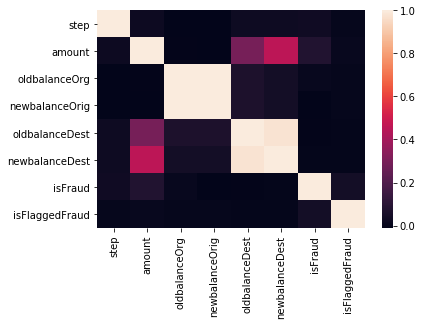

In [6]:
#displaying the heat-map of correlation among each columns
sns.heatmap(df.corr())

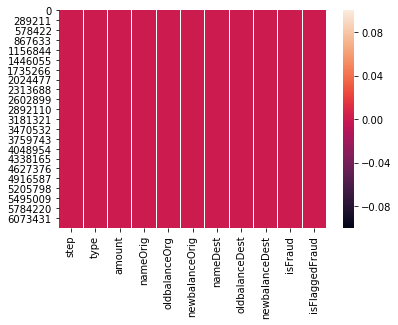

In [7]:
#checking whether there is any null value or not aand displaying the respective heatmap
sns.heatmap(df.isnull())

In [8]:
#calculating number of fraud transfers
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
len(dfFraudTransfer)

4097

In [11]:
#calculating number of frauds in cash_out
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')] 
len(dfFraudCashout)

4116

In [12]:
#calculating number of transfers which are greater than 2,00,000
df[df['isFlaggedFraud']==1].count()['isFlaggedFraud']

16

In [13]:
#displaying maximum amount of non fraud user
df[df['isFlaggedFraud']==0].max()['amount']

92445516.64

In [15]:
#drop it because wrong(since transfered amount is greater than 2,00,000 so flagged fraud)
df[df['isFlaggedFraud']==1].min()['amount']

353874.22

C:\Users\Abhijeet\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


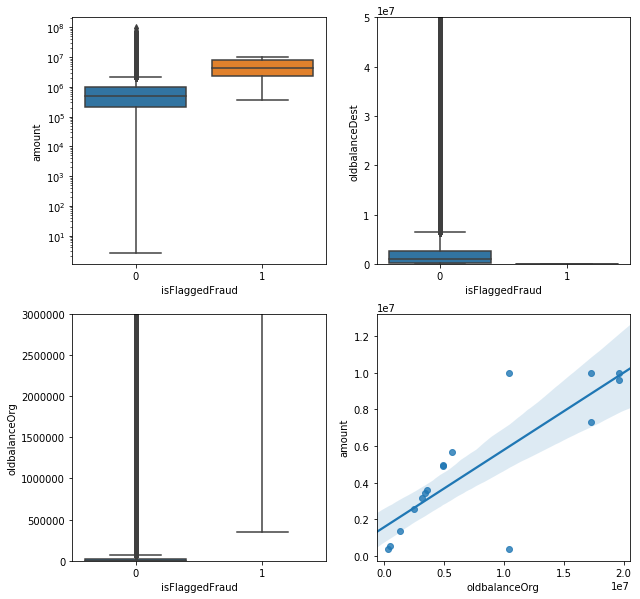

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = df.loc[(df.type == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y='amount', data = tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y='oldbalanceDest', data = tmp, ax=axs[0][1])
axs[0][1].set(ylim=(0,0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y='oldbalanceOrg', data = tmp, ax=axs[1][0])
axs[1][0].set(ylim=(0,0.3e7))
d = sns.regplot(x = 'oldbalanceOrg', y='amount', data = tmp.loc[(tmp.isFlaggedFraud == 1), :], ax=axs[1][1])
plt.show()


C:\Users\Abhijeet\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Abhijeet\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


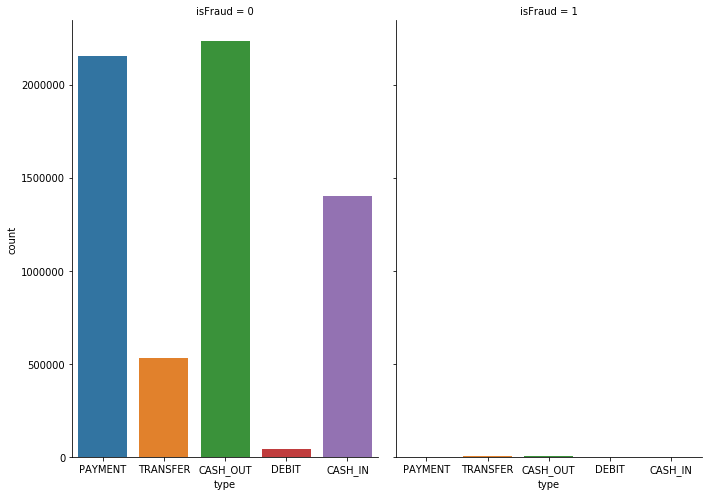

In [18]:
#displaying the factor plots
sns.factorplot(x="type",col='isFraud',data = df,kind= 'count',size=7,aspect=.7)

In [20]:
#counting total no. of enteries in 'is Fraud' column
q=df.count()['isFraud']
#Finding no.transactions where amount is not 0, both new and old balance destination is 0 but when it is not fraud
p=len(df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.amount) & (df.isFraud == 0)])
#calculating fractions of such above transactions
print((p/q)*100)
#Finding no.transactions where amount is not 0, both new and old balance destination is 0 but when it is not fraud
r=len(df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.amount) & (df.isFraud == 1)])
#calculating fractions of such above transactions
print((r/q)*100)




36.35618660237449
0.06396735935825179


# Data Cleaning 

In [14]:
#We have analysed that fraud transaction exists only for 'TRANSFER' and 'CASH_OUT'
#Creating a new dataset containing only transfer and cash-outs
X= df.loc[(df['type'] == 'TRANSFER') | (df['type']== 'CASH_OUT') ]

In [23]:
#displaying the first 5 data of x
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [15]:
#Eliminate columns shown to be irrelevant for analysis in the EDA
X.drop(['nameOrig','nameDest','isFlaggedFraud','step'],axis =1,inplace=True)

C:\Users\Abhijeet\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
15,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
19,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
24,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [26]:
X.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [16]:
#converting the categorical values into binary values for the column 'type'
typee = pd.get_dummies(X['type'],drop_first= True)
#storing the new dataset in 'NewData' after concatinating with the type column
NewData = pd.concat([X,typee],axis = 1)
# dropping the type column as we don't need the categorical values any more, rather the binary ones
NewData.drop(['type'],inplace=True,axis=1)


In [38]:
NewData.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER
2,181.00,181.0,0.0,0.0,0.00,1,1
3,181.00,181.0,0.0,21182.0,0.00,1,0
15,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,215310.30,705.0,0.0,22425.0,0.00,0,1
24,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


In [41]:
NewData.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER
2,181.00,181.0,0.0,0.0,0.00,1,1
3,181.00,181.0,0.0,21182.0,0.00,1,0
15,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,215310.30,705.0,0.0,22425.0,0.00,0,1
24,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


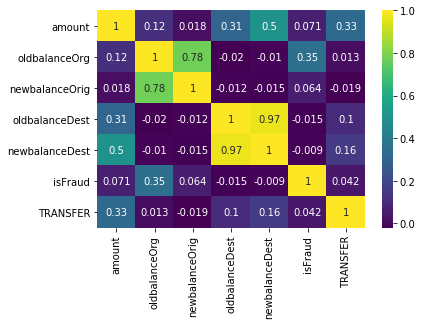

In [42]:
#displaying the heat map of correlation
sns.heatmap(NewData.corr(),annot=True,cmap='viridis')

# Under-Sampling

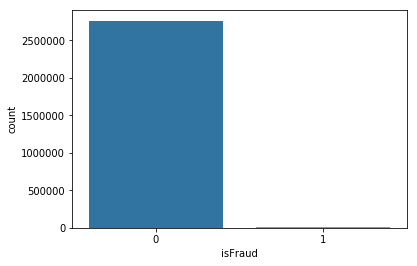

In [43]:
# displaying the countplot
sns.countplot(x='isFraud' ,data=NewData)

In [17]:
#from the countplot we observe that dataset is imbalanced
#Hence we move on to balance the data
#Calculating the number of fraud transactions in our new calculated dataset
frauds =len(NewData[NewData['isFraud'] == 1])
#Storing the corresponding to the fraud transaction indices
fraud_indices = NewData[NewData.isFraud == 1].index
#Storing the corresponding to the non fraud transaction indices
non_fraud_indices = NewData[NewData.isFraud == 0].index

In [18]:
#calculating the number of non fraud transcations
non_frauds = len(NewData[NewData['isFraud'] == 0])
#we randomly choose from non-fraud-indices , such that its number equals with no. of fraud ones
np.random.seed(0)
random_indices = np.random.choice(non_fraud_indices,frauds, replace=False)
len(random_indices)

8213

In [20]:
#random indices and fraud indices are concanated and we obtain the indices we require for our new balanced dataset
under_sample_indices = np.concatenate([random_indices,fraud_indices],axis=0)
len(under_sample_indices)

16426

In [21]:
#Obtaining the new final balanced data-set using the indices obtained in the previous dataset
under_sample = NewData.loc[under_sample_indices]
under_sample.reset_index(inplace=True,drop=True)
under_sample.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER
0,200978.67,6592.0,0.0,0.00,200978.67,0,0
1,133246.97,0.0,0.0,288141.15,421388.12,0,0
2,2875864.54,15011.0,0.0,0.00,2875864.54,0,1
3,293331.60,0.0,0.0,491315.07,784646.67,0,0
4,201668.50,0.0,0.0,2025944.19,2227612.69,0,0


In [22]:
#calculating the number of non fraud transactions in under sampled dataset
under_sample[under_sample['isFraud']==0].count()

amount            8213
oldbalanceOrg     8213
newbalanceOrig    8213
oldbalanceDest    8213
newbalanceDest    8213
isFraud           8213
TRANSFER          8213
dtype: int64

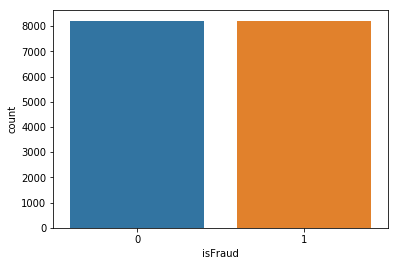

In [51]:
#displaying the counplot
sns.countplot(x='isFraud',data=under_sample)

In [52]:
#contrary to the previous counter plots both the frauds and the non-frauds cover equal area under the curves


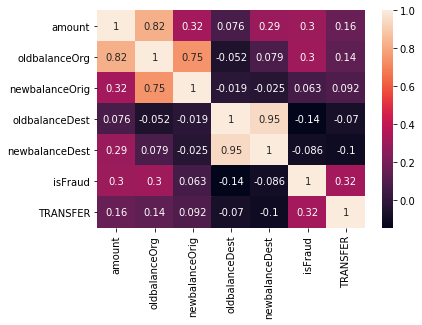

In [53]:
#displaying the heatmap of correlation
sns.heatmap(under_sample.corr(),annot=True)

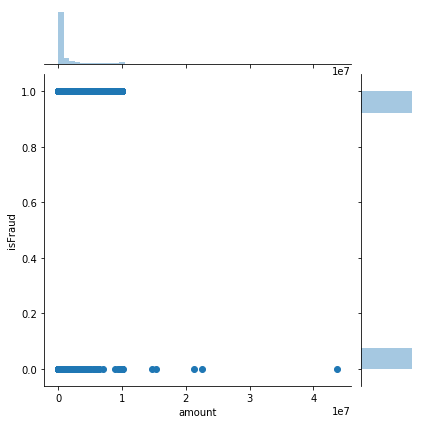

In [54]:
#Joint-plot of'amount' vs. 'isFraud'
sns.jointplot(x='amount',y='isFraud',data=under_sample)

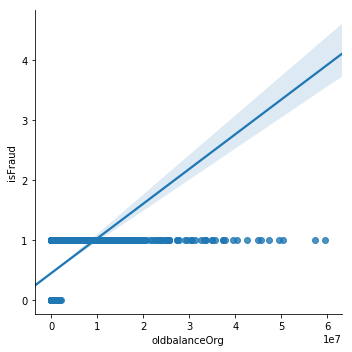

In [55]:
sns.lmplot(x='oldbalanceOrg',y='isFraud',data=under_sample)

# Training our Model

In [23]:
#choosing our dependent and independent variables,respectively
y = under_sample['isFraud']
x = under_sample[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest',
                 'newbalanceDest','TRANSFER']]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#Choosing training data to be 30% and rest as our testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

###   

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
#creating object for Logistic regression
lr_under = LogisticRegression()

In [28]:
#providing datas to train the machine
lr_under.fit(x_train,y_train)

C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
#storing the predicted values
y_under_pred = lr_under.predict(x_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
#printing the classification report
print(classification_report(y_test,y_under_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2484
           1       0.89      0.97      0.93      2444

   micro avg       0.93      0.93      0.93      4928
   macro avg       0.93      0.93      0.93      4928
weighted avg       0.93      0.93      0.93      4928



In [32]:
#we find model accuracy to be 93%. Hence we can accept the model

In [33]:
#printing the confusion matrix
print(confusion_matrix(y_test,y_under_pred))

[[2189  295]
 [  72 2372]]


In [70]:
#Cross-validation of our model
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=lr_under,X=x_train,y=y_train)
accuracies.mean()

C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.916941969720159

In [34]:
from sklearn.metrics import roc_curve

In [35]:
fpr, tpr,_=roc_curve(y_under_pred,y_test,drop_intermediate=False)

In [36]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

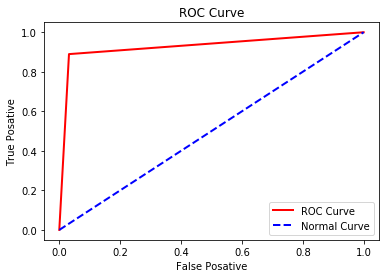

In [76]:
#plotting the ROC curve
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--',label= 'Normal Curve')
##Title and label
plt.xlabel('False Posative')
plt.ylabel('True Posative')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [37]:
#Finding the area under ROC curve
from sklearn import metrics
metrics.auc(fpr, tpr)

0.9287722548613311

# KNN ALGORITHM

###   

In [38]:
from sklearn.preprocessing import StandardScaler 

In [39]:
#creating standardscalar
scalar = StandardScaler()


In [40]:
#scaling the dataset o make the mean 0 and standard deviation 1 
scalar.fit(x)

C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
scaled_features = scalar.transform(x)

C:\Users\Abhijeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [42]:
#creating a new dataset after transforming the old data set 
df_feat = pd.DataFrame(scaled_features,columns = x.columns) 




In [43]:
df_feat.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,TRANSFER
0,-0.363990,-0.318615,-0.074574,-0.276949,-0.320205,-0.730062
1,-0.399606,-0.321117,-0.074574,-0.206708,-0.272394,-0.730062
2,1.042561,-0.315421,-0.074574,-0.276949,0.260028,1.369746
3,-0.315427,-0.321117,-0.074574,-0.157180,-0.193596,-0.730062
4,-0.363627,-0.321117,-0.074574,0.216919,0.119410,-0.730062


In [45]:
# Defining of dependent and independent variables,respectively
x1=df_feat[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest', 'TRANSFER']] 
y1=under_sample['isFraud']

In [46]:
#30% of the data is used for testing and remaining 705 is used for training
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=101)


In [47]:
from sklearn.neighbors import KNeighborsClassifier 

In [48]:
#creating object with 1 neighbour hence predicting the results
Knn=KNeighborsClassifier(n_neighbors=1) 
Knn.fit(x1_train,y1_train)
pred=Knn.predict(x1_test) 
pred


array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [49]:
#printing the confuusion matrix 
print(confusion_matrix(y1_test,pred))



[[2390   94]
 [  86 2358]]


In [50]:
#printing the classification report 
print(classification_report(y1_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2484
           1       0.96      0.96      0.96      2444

   micro avg       0.96      0.96      0.96      4928
   macro avg       0.96      0.96      0.96      4928
weighted avg       0.96      0.96      0.96      4928



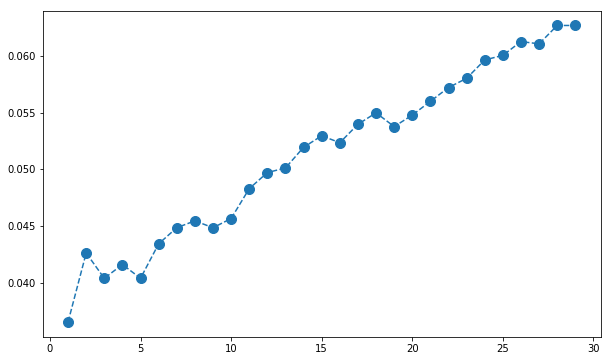

In [51]:
#we find that our knn model is 96% accurate. Hence it can be accepted.
 
#calculating the error rate for different values of 'n-neighbours' 
error_rate=[]
for i in range(1,30): 
    Knn=KNeighborsClassifier(n_neighbors=i) 
    Knn.fit(x1_train,y1_train) 
    pred_i=Knn.predict(x1_test) 
    error_rate.append(np.mean(pred_i!=y1_test))
plt.figure(figsize=(10,6)) 
plt.plot(range(1,30),error_rate,linestyle='dashed',marker='o',markersize=10)


In [52]:
# the graph shows that knn has least error when number of neighbours selected is 1 which we have already selected 
#Performing cross-validation on our selected model
from sklearn.model_selection import cross_val_score 
accuracies=cross_val_score(estimator=Knn,X=x1_train,y=y1_train) 
accuracies.mean()



C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9328575317704852

In [53]:
fpr1, tpr1,_=roc_curve(pred,y1_test,drop_intermediate=False) 
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

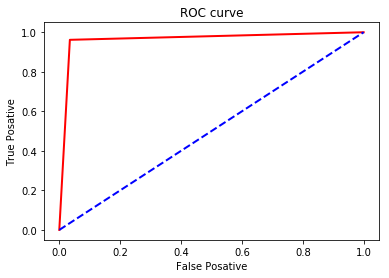

In [55]:
#plotting the ROC curve 
plt.plot(fpr1, tpr1, color='red', lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
##Title and label
plt.xlabel('False Posative') 
plt.ylabel('True Posative') 
plt.title('ROC curve') 
plt.show()




In [56]:
#Finding area under ROC curve 
metrics.auc(fpr1,tpr1)

0.9634652533818951

# SUPPORT VECTOR MACHINE

In [57]:
from sklearn.svm import SVC 
#Creating SVM object
model = SVC()


In [58]:
#Training of model 
model.fit(x_train,y_train)

C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
#Prediction using SVM
pred = model.predict(x_test)



In [60]:
#Confusion matrix display 
print(confusion_matrix(y_test,pred))

[[2484    0]
 [2400   44]]


In [61]:
#Classification report of our SVM model 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67      2484
           1       1.00      0.02      0.04      2444

   micro avg       0.51      0.51      0.51      4928
   macro avg       0.75      0.51      0.35      4928
weighted avg       0.75      0.51      0.36      4928



In [62]:
#Cross-validation of our SVM model
from sklearn.model_selection import cross_val_score 
accuracies=cross_val_score(estimator=model,X=x_train,y=y_train) 
accuracies.mean()


C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default va

0.5060011572214412

In [64]:
#We try to improve our SVM model by using GridSearhCV 
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [66]:
#Training the model using grid search 
grid.fit(x_train,y_train)



C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.5016957996347509, total=   8.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.8s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.5016957996347509, total=   8.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.9s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.5018267223382046, total=   9.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5016957996347509, total=   8.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5016957996347509, total=   8.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5018267223382046, total=   8.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.5016957996347509, total=   8.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.5016957996347509, total=   8.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.5018267223382046, total=   8.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 21.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [67]:
#Finding best parameter for grid_search 
grid.best_params_



{'C': 10, 'gamma': 0.0001}

In [68]:
#Finding best estimator for grid search 
grid.best_estimator_ 
grid_pred=grid.predict(x_test)

In [69]:
#Displaying of classification report 
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      2484
           1       1.00      0.20      0.33      2444

   micro avg       0.60      0.60      0.60      4928
   macro avg       0.78      0.60      0.53      4928
weighted avg       0.78      0.60      0.53      4928



In [72]:
#Displaying the confusion matrix 
print(confusion_matrix(y_test,grid_pred))


[[2484    0]
 [1956  488]]


In [71]:
#Cross-validation of our model
from sklearn.model_selection import cross_val_score 
accuracies=cross_val_score(estimator=grid,X=x_train,y=y_train) 
print(accuracies.mean())


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................


C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, score=0.501761252446184, total=   3.7s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, score=0.501761252446184, total=   3.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, score=0.501761252446184, total=   3.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.501761252446184, total=   3.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.501761252446184, total=   3.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.501761252446184, total=   3.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.501761252446184, total=   3.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.501761252446184, total=   3.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.501761252446184, total=   3.7s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  7.8min finished
C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.501761252446184, total=   4.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, score=0.501761252446184, total=   4.5s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, score=0.501761252446184, total=   3.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.501761252446184, total=   3.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.501761252446184, total=   3.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.501761252446184, total=   3.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.501761252446184, total=   4.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.501761252446184, total=   4.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.501761252446184, total=   4.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  8.4min finished
C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.5015649452269171, total=   4.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, score=0.501761252446184, total=   3.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, score=0.501761252446184, total=   3.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5015649452269171, total=   4.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.501761252446184, total=   3.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.501761252446184, total=   3.8s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.5015649452269171, total=   4.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.501761252446184, total=   4.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.501761252446184, total=   3.8s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  8.4min finished


0.5788836634791333


In [73]:
#We find that SVM has very low accuracy,even by using GridSearch hence we discard this model.

# GAUSSIAN NAIVE CLASSIFIER

In [74]:
from sklearn.naive_bayes import GaussianNB

In [76]:
#creating an object
model=GaussianNB()

In [77]:
#providing data to train the machine
model.fit(x_train,y_train) 
predicted=model.predict(x_test)

In [78]:
#displaying the predicted values after prediction 
print(predicted)

[0 1 0 ... 1 0 0]


In [79]:
#printing the confusion matrix and classification report 
print(confusion_matrix(y_test,predicted)) 
print(classification_report(y_test,predicted))

[[2425   59]
 [1255 1189]]
              precision    recall  f1-score   support

           0       0.66      0.98      0.79      2484
           1       0.95      0.49      0.64      2444

   micro avg       0.73      0.73      0.73      4928
   macro avg       0.81      0.73      0.72      4928
weighted avg       0.80      0.73      0.72      4928



In [80]:
#Cross-Validation of our model
from sklearn.model_selection import cross_val_score 
accuracies=cross_val_score(estimator=model,X=x_train,y=y_train) 
accuracies.mean()


C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7214288716401045

In [81]:
fpr1, tpr1,_=roc_curve(predicted,y_test,drop_intermediate=False) 
plt.figure()



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

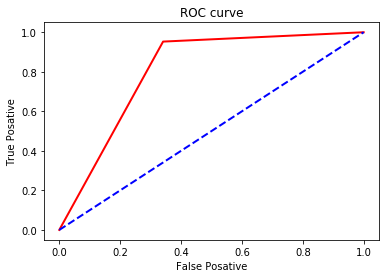

In [84]:
#plotting the ROC curve 
plt.plot(fpr1, tpr1, color='red', lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Posative')
plt.ylabel('True Posative') 
plt.title('ROC curve') 
plt.show()



In [85]:
#Calculating the area under above ROC curve 
metrics.auc(fpr1,tpr1)

0.8058458751393535

In [ ]:
#we find from our classification report, our accuracy is 80% and our cross validation score is approx 0.72 
#As, both are quite less we don't prefer this model.

# DECISION TREES

In [86]:
from sklearn.tree import DecisionTreeClassifier
#creating object and providing training data 
dtree=DecisionTreeClassifier() 
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
#Predicting frim our model 
pre=dtree.predict(x_test)

In [88]:
#displaying the classification report and confusion matrix 
print(confusion_matrix(y_test,pre)) 
print(classification_report(y_test,pre))

[[2458   26]
 [  30 2414]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2484
           1       0.99      0.99      0.99      2444

   micro avg       0.99      0.99      0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [89]:
#We find that our accuracy is quite high, to be 99%. we further cross-validate our model. 
#Cross-validation of our model
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=dtree,X=x_train,y=y_train,cv=10) 
accuracies.mean()


0.9852149674291774

In [90]:
fpr1, tpr1,_=roc_curve(pre,y_test,drop_intermediate=False) 
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

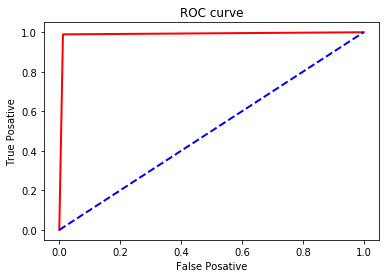

In [91]:
#plotting the ROC curve 
plt.plot(fpr1, tpr1, color='red', lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
##Title and label
plt.xlabel('False Posative') 
plt.ylabel('True Posative') 
plt.title('ROC curve') 
plt.show()


In [92]:
#Finding area under ROC curve 
metrics.auc(fpr1,tpr1)

0.9886431922407886

# RANDOM FOREST CLASSIFIER

In [93]:
from sklearn.ensemble import RandomForestClassifier
#creating an object for random forest having 1000 as parameter for n_estimators 
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
#prediction using this model 
rfc_pred=rfc.predict(x_test)
#displaying the confusion matrix and classification report 
print(confusion_matrix(y_test,rfc_pred)) 
print(classification_report(y_test,rfc_pred))


[[2440   44]
 [  12 2432]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2484
           1       0.98      1.00      0.99      2444

   micro avg       0.99      0.99      0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [95]:
#we find that our model has 99% accuracy 
#cross-validation of our model
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=rfc,X=x_train,y=y_train,cv=10) 
accuracies.mean()


0.9866930768065444

In [96]:
fpr1, tpr1,_=roc_curve(rfc_pred,y_test,drop_intermediate=False) 
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

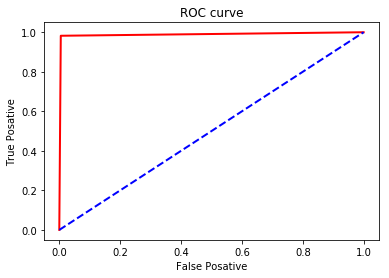

In [97]:
#plotting the ROC curve 
plt.plot(fpr1, tpr1, color='red', lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
##Title and label
plt.xlabel('False Posative') 
plt.ylabel('True Posative') 
plt.title('ROC curve') 
plt.show()



In [98]:
#Finding area under ROC curve 
metrics.auc(fpr1,tpr1)

0.9886677190753912

# We finally find that the 'Decision Tree' or the 'Random Forest Classifier' model has the best accuracy. Hence we choose it.


 